In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import tarfile
import zipfile
from scipy.io import loadmat
from urllib.request import urlretrieve
from os.path import isfile, isdir
import seaborn as sns; sns.set()
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from scipy.io import loadmat
import glob
import random
import matplotlib.image as img
#Install pillow
from PIL import Image

d_name = '../doc/rawdata'
sample = 0.2
X = []
for nfile in  os.listdir(d_name):
    if random.random() <= sample:
        bytes_read = open(os.path.join(d_name,nfile), "rb").read()
        img = Image.frombytes('L', (128,128), bytes_read)
        X.append(np.array(img).flatten())

X = np.array(X)

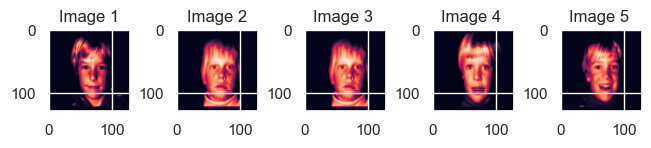

In [3]:
def plot_1_images(data, label="Image 1", ax=None):
    fn_shape = lambda X: X.reshape(128,128)
    fig = None
    if ax is None:
        fig, ax = plt.subplots(1,1, constrained_layout=True)
    ax.imshow(fn_shape(data))
    ax.set_title(label=label)
    return fig,ax

def plot_3_images(data,ix_1, ix_2 , ix_3,ix_4,ix_5):
    fn_shape = lambda X: X.reshape(128,128)
    fig, ax = plt.subplots(1,5, constrained_layout=True)
    ax[0].imshow(fn_shape(data[ix_1]))
    ax[0].set_title(label="Image %s"% ix_1)
    ax[1].imshow(fn_shape(data[ix_2]))
    ax[1].set_title(label="Image %s"% ix_2)
    ax[2].imshow(fn_shape(data[ix_2]))
    ax[2].set_title(label="Image %s "% ix_3)
    ax[3].imshow(fn_shape(data[ix_4]))
    ax[3].set_title(label="Image %s "% ix_4)
    ax[4].imshow(fn_shape(data[ix_5]))
    ax[4].set_title(label="Image %s "% ix_5)
    plt.show()
plot_3_images(X,1, 2 , 3,4,5)

In [4]:
means =[]
for i in  X:
    mean2 = np.mean(i)
    means.append(mean2)
    print(mean2)

33.34747314453125
23.3280029296875
49.4178466796875
29.31396484375
33.4610595703125
28.40032958984375
36.87548828125
19.7213134765625
21.16796875
29.6748046875
38.3780517578125
30.64605712890625
30.052490234375
46.523193359375
43.14947509765625
35.70697021484375
36.02020263671875
26.68914794921875
32.34228515625
22.77813720703125
33.97247314453125
26.364990234375
30.13330078125
33.17413330078125
39.3819580078125
23.5694580078125
36.34771728515625
29.75042724609375
21.6202392578125
27.04693603515625
40.873779296875
15.67236328125
12.3997802734375
24.08758544921875
38.56060791015625
28.416748046875
35.56317138671875
26.651123046875
31.4678955078125
25.67156982421875
44.2154541015625
35.32574462890625
30.283203125
35.32147216796875
30.740966796875
33.1619873046875
39.87823486328125
29.831787109375
22.02899169921875
40.607666015625
22.28253173828125
27.66339111328125
42.2362060546875
34.5555419921875
33.5096435546875
43.62518310546875
23.4437255859375
29.217529296875
26.1279296875
20.77008

In [5]:
print(len(means))
print(means)

790
[33.34747314453125, 23.3280029296875, 49.4178466796875, 29.31396484375, 33.4610595703125, 28.40032958984375, 36.87548828125, 19.7213134765625, 21.16796875, 29.6748046875, 38.3780517578125, 30.64605712890625, 30.052490234375, 46.523193359375, 43.14947509765625, 35.70697021484375, 36.02020263671875, 26.68914794921875, 32.34228515625, 22.77813720703125, 33.97247314453125, 26.364990234375, 30.13330078125, 33.17413330078125, 39.3819580078125, 23.5694580078125, 36.34771728515625, 29.75042724609375, 21.6202392578125, 27.04693603515625, 40.873779296875, 15.67236328125, 12.3997802734375, 24.08758544921875, 38.56060791015625, 28.416748046875, 35.56317138671875, 26.651123046875, 31.4678955078125, 25.67156982421875, 44.2154541015625, 35.32574462890625, 30.283203125, 35.32147216796875, 30.740966796875, 33.1619873046875, 39.87823486328125, 29.831787109375, 22.02899169921875, 40.607666015625, 22.28253173828125, 27.66339111328125, 42.2362060546875, 34.5555419921875, 33.5096435546875, 43.6251831054

Mean Face

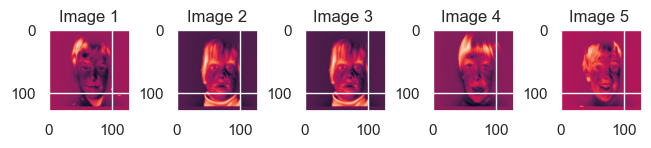

In [6]:
X_mean = X.mean(axis=0)
X_center = X - X_mean
plot_3_images(X_center,1, 2 ,3,4,5)

(<Figure size 640x480 with 1 Axes>, <Axes: title={'center': 'Image 1'}>)

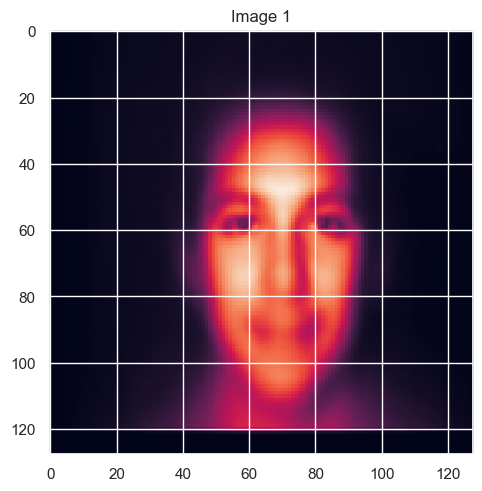

In [7]:
plot_1_images(X_mean)

matriz de covarianza

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=200)
# images x dim
X_reduced = pca.fit_transform(X_center)

In [9]:
eigen_values = pca.explained_variance_
eigen_faces = pca.components_

In [10]:
eigen_values

array([6.86066742e+06, 2.08296076e+06, 1.53772958e+06, 1.00259107e+06,
       9.37118667e+05, 8.20223808e+05, 6.17399555e+05, 4.00191260e+05,
       3.76049239e+05, 2.96319887e+05, 2.43763582e+05, 2.23295364e+05,
       1.99118783e+05, 1.88523024e+05, 1.75979631e+05, 1.67383322e+05,
       1.59149043e+05, 1.33851243e+05, 1.25367513e+05, 1.18425547e+05,
       1.12331572e+05, 1.07581208e+05, 1.06530874e+05, 1.04333378e+05,
       9.87634100e+04, 9.64467774e+04, 9.30415637e+04, 8.84040044e+04,
       8.11673491e+04, 8.03511664e+04, 7.57003838e+04, 7.11188817e+04,
       6.74671106e+04, 6.55133119e+04, 6.41772776e+04, 6.20635031e+04,
       5.98871081e+04, 5.75758435e+04, 5.69650483e+04, 5.23570950e+04,
       5.17924754e+04, 5.05965668e+04, 4.98673174e+04, 4.77634619e+04,
       4.58986316e+04, 4.52394941e+04, 4.35490083e+04, 4.12404543e+04,
       4.02623125e+04, 3.96283791e+04, 3.94052896e+04, 3.78189863e+04,
       3.75143219e+04, 3.53535326e+04, 3.45381269e+04, 3.41347596e+04,
      

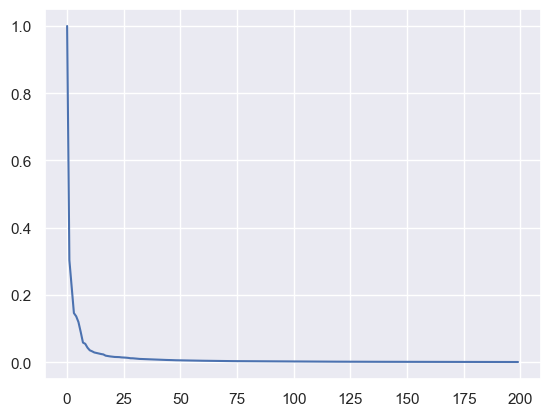

In [11]:
# Se puede ver como los primeras componentes contienen mas informacion
plt.plot(range(0,200), eigen_values/eigen_values[0])

(<Figure size 640x480 with 1 Axes>, <Axes: title={'center': 'Image 1'}>)

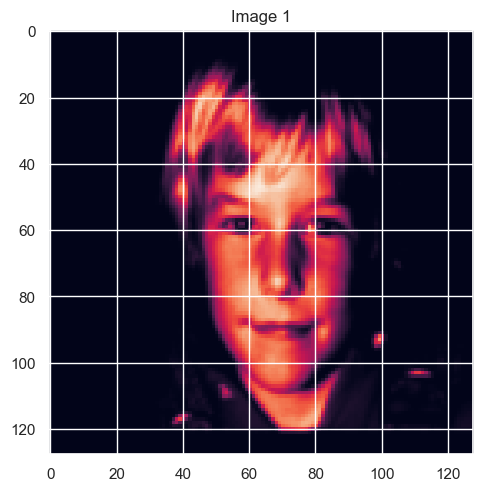

In [12]:
plot_1_images(X[1])

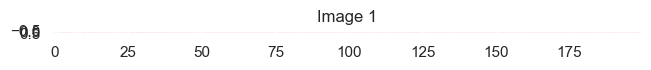

In [13]:
fig, ax = plt.subplots(1,1, constrained_layout=True)
ax.imshow(X_reduced[1].reshape(1,-1))
ax.set_title(label="Image 1")
plt.show()

Reconstruir la imagen

In [14]:
print('Componentes', X_reduced.shape)
print('Eigenvectores', eigen_faces.shape)
face_1 = np.dot(X_reduced[1].reshape(1,-1),eigen_faces)
print(face_1.sum(axis=0))

Componentes (790, 200)
Eigenvectores (200, 16384)
[-5.44539477e-13 -1.86392992e-11  4.44994653e-13 ...  0.00000000e+00
  0.00000000e+00  0.00000000e+00]


In [15]:
eigen_faces[0].shape
face_c1 = np.dot(X_reduced[1].reshape(1,-1),eigen_faces)
face_c1.shape

(1, 16384)

(<Figure size 640x480 with 1 Axes>, <Axes: title={'center': 'Image 1'}>)

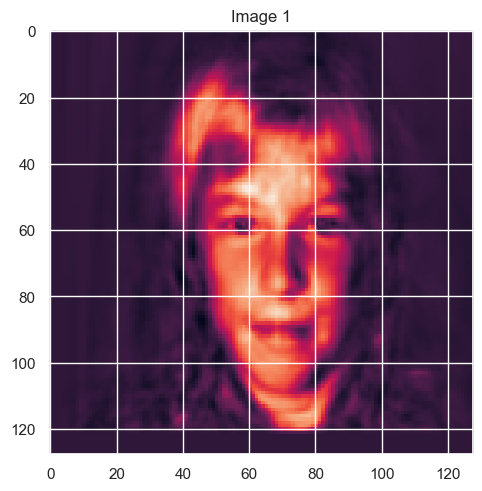

In [16]:
plot_1_images(X_mean + face_1.sum(axis=0) )

In [17]:
def variancePorcentaje(porcentage, values):
    actual =0
    suma=0
    for a in range(len(values)):
        suma = suma + values[a]
    for i in range(len(values)):
        actual =  actual +  values[i]/suma
        if actual>= porcentage:
            return i
print(f"el 90% de la vairianza se explica en los primeros {variancePorcentaje(0.9, eigen_values)} eigen_values")
print(f"el 99% de la varianza se explica en los primeros {variancePorcentaje(0.99, eigen_values)} eigen_values")

el 90% de la vairianza se explica en los primeros 48 eigen_values
el 99% de la varianza se explica en los primeros 163 eigen_values


(None, <Axes: title={'center': 'Con 99% de la varianza de los eigenfaces'}>)

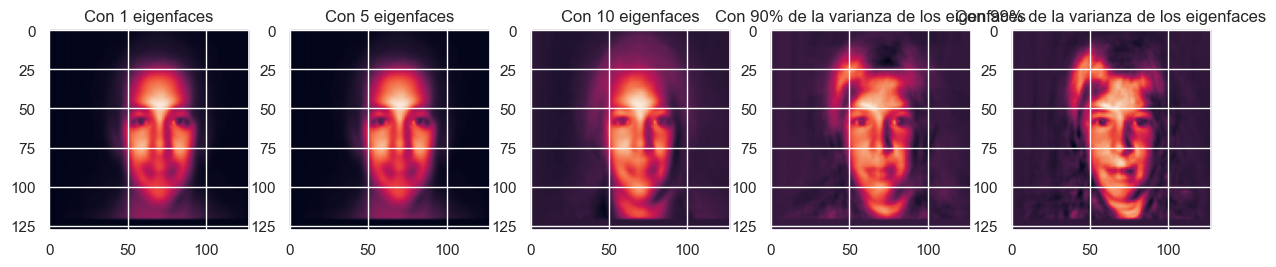

In [18]:
face_1 = X_mean + np.sum(np.dot(X_reduced[1].reshape(1,-1)[:,:5],
                                 eigen_faces[:5,:]),
                            axis=0)
face_5 = X_mean + np.sum(np.dot(X_reduced[1].reshape(1,-1)[:,:5],
                                 eigen_faces[:5,:]),
                            axis=0)
face_10 = X_mean + np.sum(np.dot(X_reduced[1].reshape(1,-1)[:,:10],
                                      eigen_faces[:10,:]),
                               axis=0)


face_180 = X_mean + np.sum(np.dot(X_reduced[1].reshape(1,-1)[:,:49],
                                      eigen_faces[:49,:]),
                               axis=0)

face_198 = X_mean + np.sum(np.dot(X_reduced[1].reshape(1,-1)[:,:163],
                                     eigen_faces[:163,:]),
                              axis=0)
fig, ax = plt.subplots(1,5,figsize=(15,15))
plot_1_images(face_1,ax=ax[0],label="Con 1 eigenfaces")
plot_1_images(face_5,ax=ax[1],label="Con 5 eigenfaces")
plot_1_images(face_10,ax=ax[2],label="Con 10 eigenfaces")
plot_1_images(face_180,ax=ax[3],label="Con 90% de la varianza de los eigenfaces")
plot_1_images(face_198,ax=ax[4],label="Con 99% de la varianza de los eigenfaces")

(None, <Axes: title={'center': 'Con 99% de la varianza de los eigenfaces'}>)

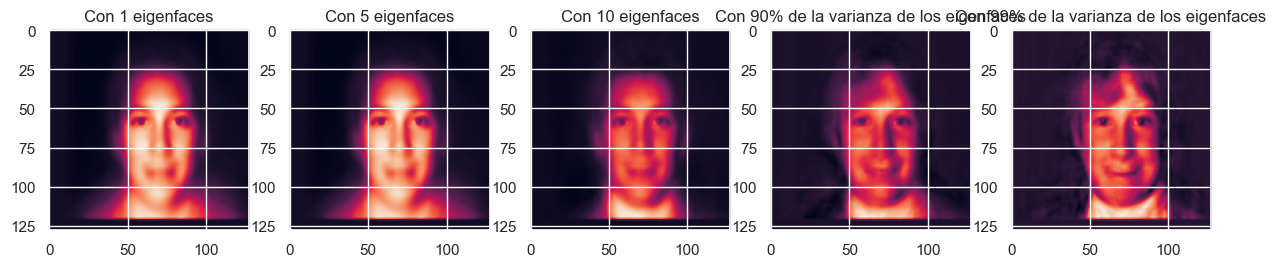

In [19]:
face_1 = X_mean + np.sum(np.dot(X_reduced[0].reshape(1,-1)[:,:5],
                                 eigen_faces[:5,:]),
                            axis=0)
face_5 = X_mean + np.sum(np.dot(X_reduced[0].reshape(1,-1)[:,:5],
                                 eigen_faces[:5,:]),
                            axis=0)
face_10 = X_mean + np.sum(np.dot(X_reduced[0].reshape(1,-1)[:,:10],
                                      eigen_faces[:10,:]),
                               axis=0)


face_180 = X_mean + np.sum(np.dot(X_reduced[0].reshape(1,-1)[:,:49],
                                      eigen_faces[:49,:]),
                               axis=0)

face_198 = X_mean + np.sum(np.dot(X_reduced[0].reshape(1,-1)[:,:163],
                                     eigen_faces[:163,:]),
                              axis=0)
fig, ax = plt.subplots(1,5,figsize=(15,15))
plot_1_images(face_1,ax=ax[0],label="Con 1 eigenfaces")
plot_1_images(face_5,ax=ax[1],label="Con 5 eigenfaces")
plot_1_images(face_10,ax=ax[2],label="Con 10 eigenfaces")
plot_1_images(face_180,ax=ax[3],label="Con 90% de la varianza de los eigenfaces")
plot_1_images(face_198,ax=ax[4],label="Con 99% de la varianza de los eigenfaces")

(None, <Axes: title={'center': 'Con 99% de la varianza de los eigenfaces'}>)

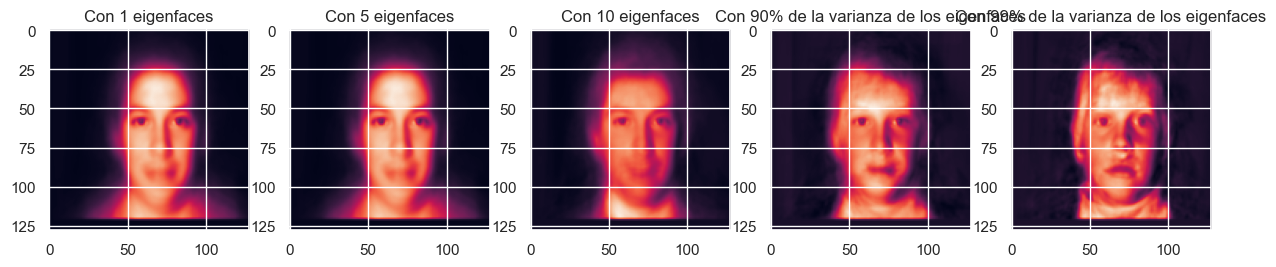

In [20]:
face_1 = X_mean + np.sum(np.dot(X_reduced[2].reshape(1,-1)[:,:5],
                                 eigen_faces[:5,:]),
                            axis=0)
face_5 = X_mean + np.sum(np.dot(X_reduced[2].reshape(1,-1)[:,:5],
                                 eigen_faces[:5,:]),
                            axis=0)
face_10 = X_mean + np.sum(np.dot(X_reduced[2].reshape(1,-1)[:,:10],
                                      eigen_faces[:10,:]),
                               axis=0)


face_180 = X_mean + np.sum(np.dot(X_reduced[2].reshape(1,-1)[:,:49],
                                      eigen_faces[:49,:]),
                               axis=0)

face_198 = X_mean + np.sum(np.dot(X_reduced[2].reshape(1,-1)[:,:163],
                                     eigen_faces[:163,:]),
                              axis=0)
fig, ax = plt.subplots(1,5,figsize=(15,15))
plot_1_images(face_1,ax=ax[0],label="Con 1 eigenfaces")
plot_1_images(face_5,ax=ax[1],label="Con 5 eigenfaces")
plot_1_images(face_10,ax=ax[2],label="Con 10 eigenfaces")
plot_1_images(face_180,ax=ax[3],label="Con 90% de la varianza de los eigenfaces")
plot_1_images(face_198,ax=ax[4],label="Con 99% de la varianza de los eigenfaces")

(None, <Axes: title={'center': 'Con 99% de la varianza de los eigenfaces'}>)

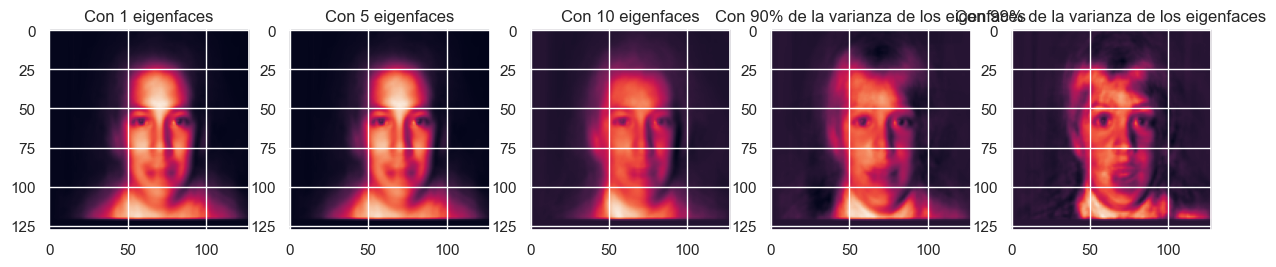

In [21]:
face_1 = X_mean + np.sum(np.dot(X_reduced[3].reshape(1,-1)[:,:5],
                                 eigen_faces[:5,:]),
                            axis=0)
face_5 = X_mean + np.sum(np.dot(X_reduced[3].reshape(1,-1)[:,:5],
                                 eigen_faces[:5,:]),
                            axis=0)
face_10 = X_mean + np.sum(np.dot(X_reduced[3].reshape(1,-1)[:,:10],
                                      eigen_faces[:10,:]),
                               axis=0)


face_180 = X_mean + np.sum(np.dot(X_reduced[3].reshape(1,-1)[:,:49],
                                      eigen_faces[:49,:]),
                               axis=0)

face_198 = X_mean + np.sum(np.dot(X_reduced[3].reshape(1,-1)[:,:163],
                                     eigen_faces[:163,:]),
                              axis=0)
fig, ax = plt.subplots(1,5,figsize=(15,15))
plot_1_images(face_1,ax=ax[0],label="Con 1 eigenfaces")
plot_1_images(face_5,ax=ax[1],label="Con 5 eigenfaces")
plot_1_images(face_10,ax=ax[2],label="Con 10 eigenfaces")
plot_1_images(face_180,ax=ax[3],label="Con 90% de la varianza de los eigenfaces")
plot_1_images(face_198,ax=ax[4],label="Con 99% de la varianza de los eigenfaces")

(None, <Axes: title={'center': 'Con 99% de la varianza de los eigenfaces'}>)

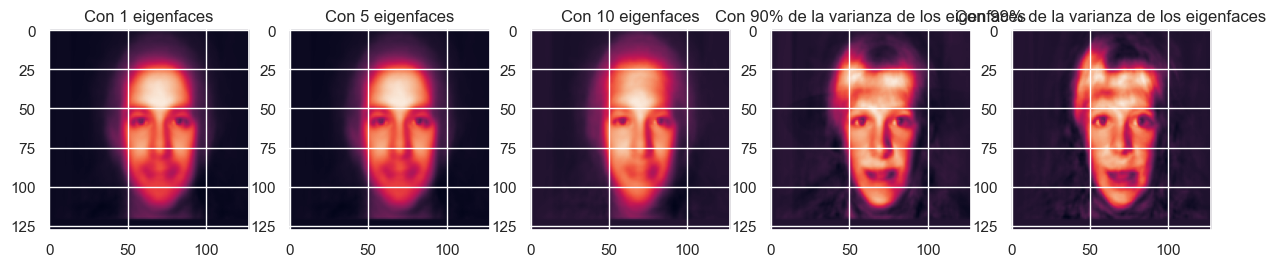

In [22]:
face_1 = X_mean + np.sum(np.dot(X_reduced[4].reshape(1,-1)[:,:5],
                                 eigen_faces[:5,:]),
                            axis=0)
face_5 = X_mean + np.sum(np.dot(X_reduced[4].reshape(1,-1)[:,:5],
                                 eigen_faces[:5,:]),
                            axis=0)
face_10 = X_mean + np.sum(np.dot(X_reduced[4].reshape(1,-1)[:,:10],
                                      eigen_faces[:10,:]),
                               axis=0)


face_180 = X_mean + np.sum(np.dot(X_reduced[4].reshape(1,-1)[:,:49],
                                      eigen_faces[:49,:]),
                               axis=0)

face_198 = X_mean + np.sum(np.dot(X_reduced[4].reshape(1,-1)[:,:163],
                                     eigen_faces[:163,:]),
                              axis=0)
fig, ax = plt.subplots(1,5,figsize=(15,15))
plot_1_images(face_1,ax=ax[0],label="Con 1 eigenfaces")
plot_1_images(face_5,ax=ax[1],label="Con 5 eigenfaces")
plot_1_images(face_10,ax=ax[2],label="Con 10 eigenfaces")
plot_1_images(face_180,ax=ax[3],label="Con 90% de la varianza de los eigenfaces")
plot_1_images(face_198,ax=ax[4],label="Con 99% de la varianza de los eigenfaces")

## Punto 2 kmeans

In [23]:
class Kmeans:
    
    def __init__(self, k):
        self.k = k
        self.mu = None
        self.his_mu = []
        
    def calculate_labels(self,X):
        # Using Distance formula -2X*MU  + X^2 + MU^2
        dis = -2 * np.dot(X, self.mu.T) 
        dis = dis + np.power(X, 2).sum(axis=1).reshape((-1, 1))
        dis = dis + np.power(self.mu,2).sum(axis=1)
        n_l = dis.argsort(axis=1)[:,0].reshape((-1,1))
        return n_l
    
    def train(self, X, verbose=False):
        X = np.array(X)
        l = np.random.randint(0,high=self.k,size=(X.shape[0],1))
        n_l = None
        while n_l is None or not np.array_equal(l,n_l):
            cur_mu = []
            if n_l is not None:
                l = n_l
            X_l = np.hstack((X,l))
            for i in range(self.k):
                cur_mu.append( 
                    np.mean(
                        X_l[np.where(X_l[:,-1]==i),:-1],
                        axis=1
                    )
                )
            self.mu = np.vstack(cur_mu) 
            self.his_mu.append(self.mu)
            n_l = self.calculate_labels(X)
            if verbose: print(self.mu)
                
    def predict(self,X):
        n_l = self.calculate_labels(X)
        return n_l

Explained variation per principal component: 0.4893919241799892
[[  394.49811597 -1789.37168579   378.45100566]
 [-1750.48142996   726.09953298  -137.60957375]
 [ 3788.22707008  -704.9513289    266.0754829 ]
 ...
 [ -810.37061941 -1408.62496546  -482.75934396]
 [  946.75110463 -1071.68960644  -336.8140403 ]
 [ -888.02946168  -284.60433571   -44.54461414]]


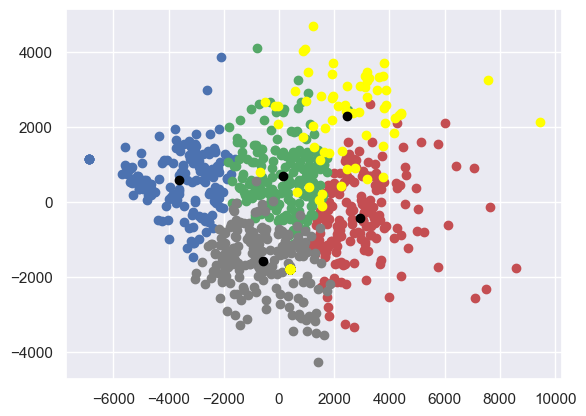

In [24]:
def reduce_dim_pca(components, X_train, X_test):
    """
    This method reduce the dimensionality of the Train and Test Matrix.
    """
    pca = PCA(n_components=components)
    X_r = pca.fit(X_train).transform(X_train)
    X_nr = pca.transform(X_test)
    text = 'Explained variation per principal component: {}'
    print(text.format(np.sum(pca.explained_variance_ratio_[:components])))
    return X_r, X_nr

X_r, X_nr = reduce_dim_pca(3,X,X)
k =5
print(X_r)
kmeans = Kmeans(k)
kmeans.train(X_r)
labels = kmeans.predict(X_r)



fig, ax = plt.subplots(1,1)
kmeans = Kmeans(5)
kmeans.train(X_r)
label = kmeans.predict(X_r)
 
ax.scatter(X_r[np.where(label==0),0],X_r[np.where(label==0),1],c='r')
ax.scatter(X_r[np.where(label==1),0],X_r[np.where(label==1),1],c='b')
ax.scatter(X_r[np.where(label==2),0],X_r[np.where(label==2),1],c='g')
ax.scatter(X_r[np.where(label==3),0],X_r[np.where(label==3),1],c='gray')
ax.scatter(X_r[np.where(label==4),0],X_r[np.where(label==4),1],c='yellow')
ax.scatter(X_r[np.where(label==5),0],X_r[np.where(label==5),1],c='brown')
ax.scatter(kmeans.mu[:,0],
           kmeans.mu[:,1], c='black')